# Chenyu Zhao
#### R version: 3.5.1

# MTH9879 Homework 7

Assigned: March 21, 2019.
Due: April 4, 2019 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to Yassine Ghalane (yassine.ghalem@gmail.com), Victor Istrakov (stavka@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TAs.

### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

### Answer

$$
\Var[X_{t+\tau}-X_t]=\Var(\sum_{i=t+1}^{t+\tau}\epsilon_i)=\tau+2[(\tau -1)1^{-\alpha}+(\tau-2)2^{-\alpha}+\dots+(\tau-1)^{-\alpha}]=\tau+2\sum_{i=1}^{\tau-1}\frac{\tau-i}{i^\alpha}
$$

$$
\sum_{i=1}^{\tau-1}\frac{\tau-i}{i^\alpha} \sim \sum_{i=1}^{\tau}\frac{\tau}{i^\alpha} \sim \tau \int_0^{\tau} x^{-\alpha}dx=\frac{1}{1-\alpha}\tau^{2-\alpha}
$$

therefore
$$
\Var[X_{t+\tau}-X_t] \sim \tau+\frac{2}{1-\alpha}\tau^{2-\alpha} \sim \tau^{2-\alpha}
$$

when $\alpha < 1$ and $\tau \to \infty$,

## MSFT data from Alejandro Ca&ntilde;ete

### Set up R environment

In [1]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
head(msft130311.inet)

signed.shares,trade.price
-40,27.91
542309,27.91
2,27.94
16,27.94
84,27.94
-900,27.91


### 2. (6 points)

(a) Generate the series *tradeSign* of trade signs from the *msft130311.inet* data frame.

(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$

(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?

(d) Fit an $AR(p)$ model to the *tradeSign* data, allowing R to find the best value of $p$ using the default AIC criterion.  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$

(e) What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?


### Answer

(a)

In [21]:
getTradeSign<-function(data){
    res=data$signed.shares>=0
    res[res==TRUE]=1
    res[res==FALSE]=-1
    return (res)
}

tradeSign=getTradeSign(msft130311.inet)
head(tradeSign)

[1] -1  1  1  1  1 -1

(b)

In [4]:
ar1<-ar(tradeSign,order.max = 1)
ar1


Call:
ar(x = tradeSign, order.max = 1)

Coefficients:
    1  
0.821  

Order selected 1  sigma^2 estimated as  0.3236

(c)


Autocorrelations of series ‘tradeSign’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.821 0.712 0.643 0.591 0.552 0.518 0.491 0.474 0.455 0.434 0.419 0.403 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.395 0.387 0.375 0.364 0.352 0.340 0.331 0.324 0.310 0.300 0.293 0.285 0.279 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.275 0.270 0.265 0.257 0.250 0.246 0.241 0.230 0.217 0.207 0.202 0.200 0.199 
   39    40    41    42 
0.193 0.189 0.180 0.175 

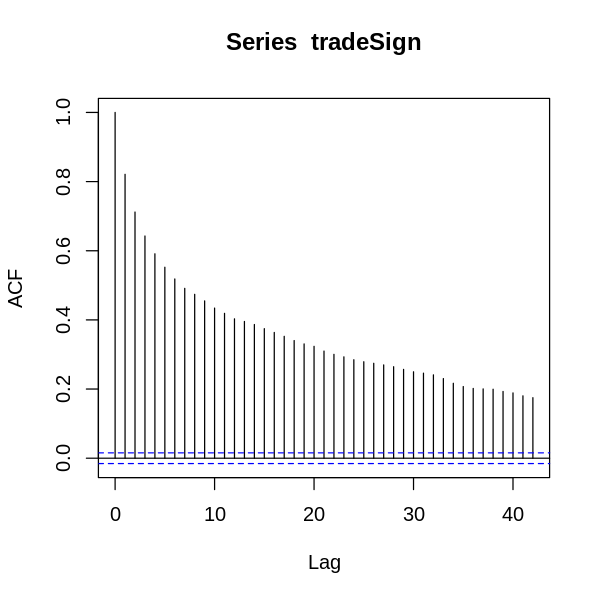

In [5]:
library(repr)
options(repr.plot.width=5,repr.plot.height=5)

acf(tradeSign, plot=F)
acf(tradeSign)

If the AR(1) model is correct, the acf(k) should be $\phi^k$. But here only acf(1) matches the estimated $\phi$. And the higher orders have long memory, not exponentially decay.

mean-squared error of this AR(1) is 0.3236

(d)

In [6]:
#install.packages("forecast")

In [7]:
library(forecast)
ar2<-auto.arima(tradeSign,max.p=50,max.d=0,max.q=0,ic="aic")
ar2

Series: tradeSign 
ARIMA(14,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ar6      ar7     ar8     ar9
      0.6965  0.0375  0.0419  0.0184  0.0237  0.0054  -0.0006  0.0305  0.0112
s.e.  0.0079  0.0096  0.0096  0.0096  0.0096  0.0096   0.0096  0.0096  0.0096
         ar10    ar11     ar12    ar13    ar14    mean
      -0.0080  0.0156  -0.0131  0.0238  0.0198  0.0853
s.e.   0.0096  0.0097   0.0097  0.0096  0.0079  0.0452

sigma^2 estimated as 0.3116:  log likelihood=-13415.27
AIC=26862.54   AICc=26862.58   BIC=26985.49

(e)

The selected order is 14.

In [8]:
ar3<-ar(tradeSign,order.max =14)
ar3


Call:
ar(x = tradeSign, order.max = 14)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.6962   0.0375   0.0422   0.0186   0.0236   0.0048   0.0002   0.0302  
      9       10       11       12       13       14  
 0.0112  -0.0080   0.0154  -0.0127   0.0237   0.0199  

Order selected 14  sigma^2 estimated as  0.3116

mean-squared error of this AR(1) is 0.3116

### 3. (8 points)

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.01 to 1.01 in steps of 0.02.

(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).

(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?

### Answer

(a)

In [22]:
coef<-ar3$ar
order<-ar3$order
len<-length(tradeSign)

forecast<-c()
for (i in 1:(len-order)){
    forecast<-c(forecast,sum(coef*tradeSign[(i+order-1):i]))
}
tradeSign<-tradeSign[(1+order):len]

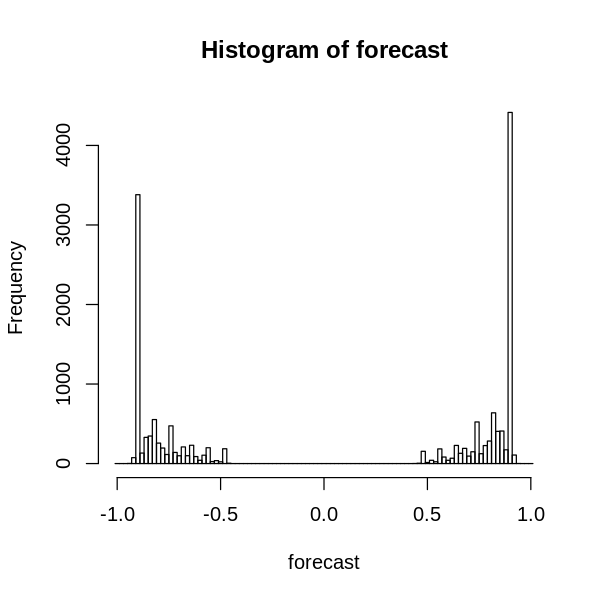

In [10]:
hist(forecast, breaks=seq(-1.01,1.01,by=0.02))

(b)


Call:
lm(formula = avgActual ~ avgForecast)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43119 -0.02477  0.01936  0.07024  0.55501 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.009603   0.032539  -0.295    0.769    
avgForecast  0.982587   0.045694  21.504   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2324 on 49 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.9042,	Adjusted R-squared:  0.9022 
F-statistic: 462.4 on 1 and 49 DF,  p-value: < 2.2e-16


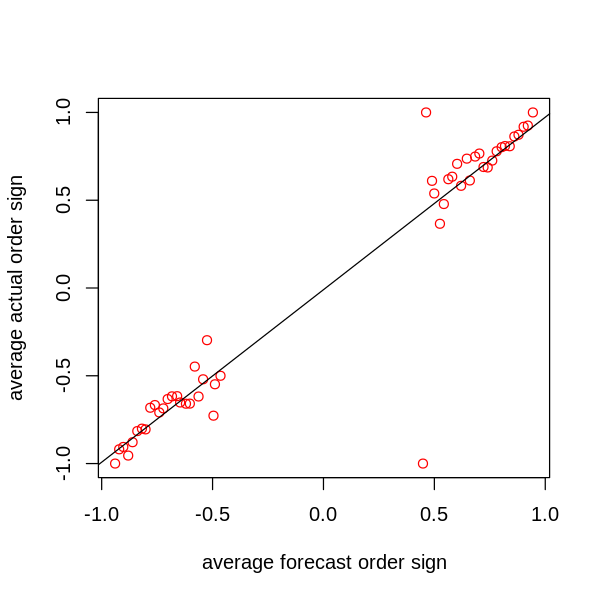

In [23]:
avgActual<-c()
avgForecast<-c()
i<--1.01
while(i<1.01){
    x<-mean(tradeSign[forecast>=i & forecast<i+0.02])
    y<-mean(forecast[forecast>=i & forecast<i+0.02])
    avgActual<-c(avgActual,x)
    avgForecast<-c(avgForecast,y)
    i<-i+0.02
}

fit <- lm(avgActual ~ avgForecast)
summary(fit)

plot(avgForecast,avgActual,xlab="average forecast order sign", ylab="average actual order sign",col="red")
abline(fit)

The slope of linear model is 0.982587.

(c)

$$
\hat \epsilon=1\times p-1\times(1-p)
$$

Therefore
$$
p=\frac{\hat \epsilon+1}{2}
$$